# MNIST Handwritten Digit Classification using Deep Learning Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(1111)
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Loading the MNIST Data from keras.datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 Images

Test Data = 10,000 Images


Single Image Dimension -> 28 X 28

Grayscale Image -> 1 Channel

In [5]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


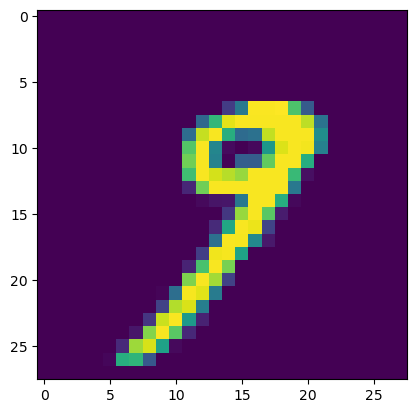

9


In [7]:
# Displaying the image
plt.imshow(X_train[33])
plt.show()

# Displaying label
print(y_train[33])

Images Labels

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

Building the Neural Network

In [11]:
# Setting up layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [12]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.8141 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4035 - accuracy: 0.9016
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3082 - accuracy: 0.9230
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2187 - accuracy: 0.9427
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1927 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1686 - accuracy: 0.9534
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1526 - accuracy: 0.9572
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1370 - accuracy: 0.9613
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.12

**Accuracy on Test Data**

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1974 - accuracy: 0.9527
0.9527000188827515


In [15]:
print(X_test.shape)

(10000, 28, 28)


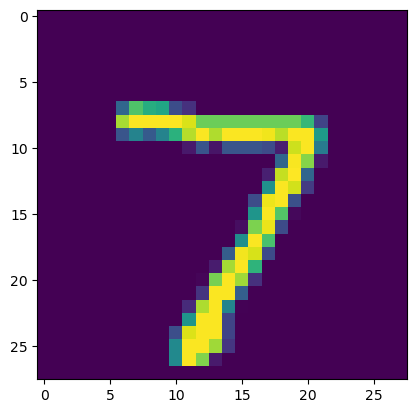

In [16]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
print(y_test[0])

7


In [18]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(y_pred.shape)

(10000, 10)


In [20]:
print(y_pred[0])

[2.8880083e-09 9.7671425e-01 9.9919492e-01 9.9994648e-01 8.6187226e-01
 9.8817879e-01 1.3384564e-08 1.0000000e+00 3.9776065e-03 9.9771529e-01]


model.predict() gives the prediction probability of each class for that data point

In [21]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [22]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 1, 1, 0, 4, 1, 4, 9, 6, 4, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 0, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 1, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 0, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 3, 9, 1, 7, 3, 2, 9, 7, 7, 6, 1, 7, 8, 0, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 0, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 0, 9, 2, 5, 4, 7, 6, 2, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 1, 0, 6, 5, 4, 6, 5, 4, 5, 1, 4, 1, 7, 1, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 1, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 0, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 1, 0, 1, 5, 9, 8, 7, 2, 3, 0, 6, 0, 2, 9, 1, 4, 5, 7, 7, 2, 1, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 1, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 1, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 1, 7, 1, 3, 3, 0, 0, 3, 1, 9, 4, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_pred -> True Labels

y_pred_labels -> Predicted Labels

**Confusion Matrix**

In [23]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [25]:
print(conf_mat)

[[ 958    1    0    3    1    4    7    4    2    0]
 [   0 1127    0    3    0    1    2    1    1    0]
 [  37  273  670   26    0    1    5    9   10    1]
 [   1    5    7  975    0    5    0    4    4    9]
 [ 243  148   19    1  532    1    3    3    0   32]
 [   2    1    0   38    0  832    8    1    4    6]
 [  12    8    4    1   38   12  877    1    5    0]
 [   1   38   21  129   26    4    0  790    4   15]
 [   3    7    5   27    6   13    7    7  883   16]
 [   5   10    0   12   90    4    0   51    2  835]]


Text(0.5, 47.7222222222222, 'Predicted Labels')

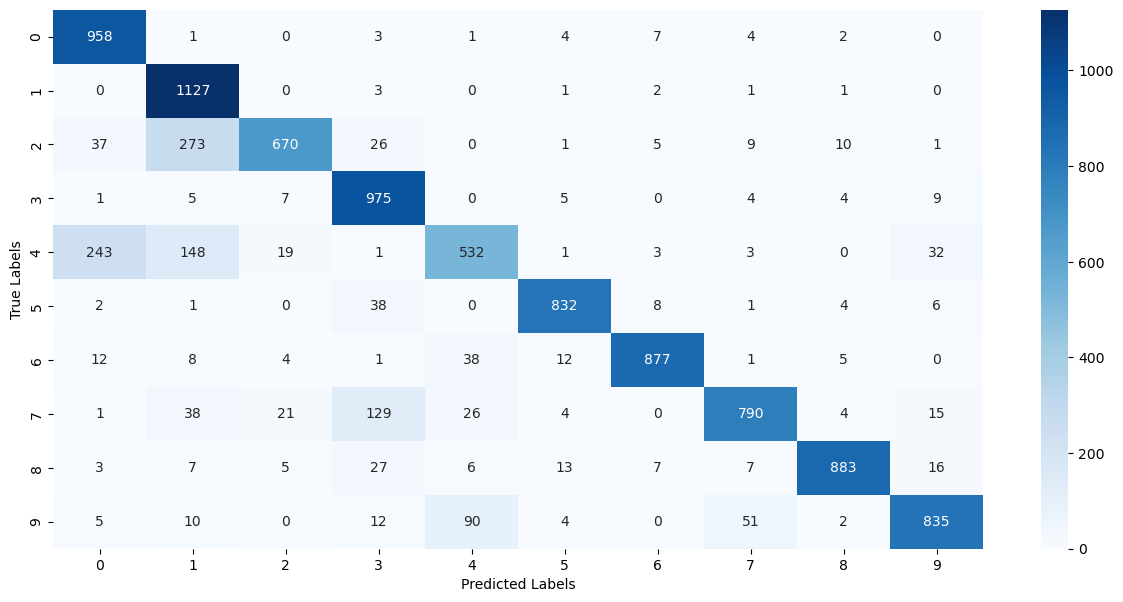

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [27]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


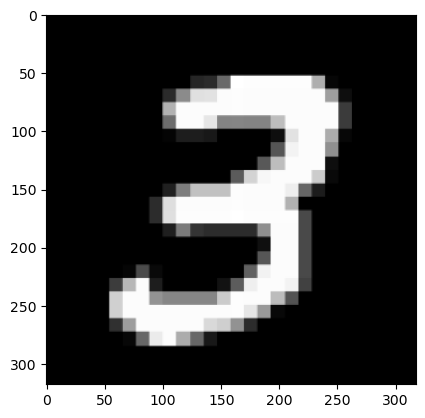

In [30]:
plt.imshow(input_image)
plt.show()

In [31]:
input_image.shape

(318, 318, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

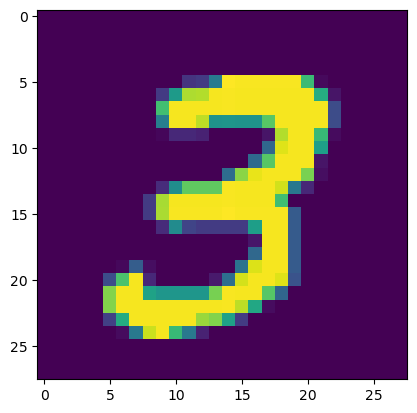

In [37]:
plt.imshow(input_image_resize)
plt.show()

In [38]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 69ms/step
[[4.8519361e-12 6.4724779e-01 6.9046421e-11 1.0000000e+00 5.8260508e-04
  9.9969250e-01 1.3922442e-12 5.0004941e-01 9.8877227e-01 9.8651421e-01]]


In [40]:
input_pred_label = np.argmax(input_prediction)

In [41]:
print(input_pred_label)

3


Predictive System

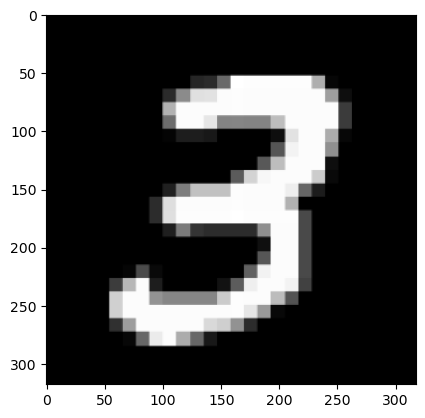

1/1 [==============================] - 5s 5s/step
The Handwritten Digit is recognised as  3


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)